In [1]:
#Lab-1
import random

def fitness(path, distance_matrix):
    cost = 0
    for i in range(len(path) - 1):
        cost += distance_matrix[path[i]][path[i + 1]]
    return cost

def random_route(num_locations):
    route = list(range(1, num_locations))
    random.shuffle(route)
    return [0] + route + [0]

def crossover(parent1, parent2):
    split = random.randint(1, len(parent1) - 2)
    child = parent1[:split] + [node for node in parent2 if node not in parent1[:split]]
    return child

def mutate(route):
    if random.random() < MUTATION_RATE:
        index1 = random.randint(1, len(route) - 2)
        index2 = random.randint(1, len(route) - 2)
        route[index1], route[index2] = route[index2], route[index1]
    return route

def initialize_population(num_locations):
    return [random_route(num_locations) for _ in range(POPULATION_SIZE)]

def genetic_algorithm(distance_matrix, num_locations):
    population = initialize_population(num_locations)
    
    for generation in range(GENERATIONS):
        population = sorted(population, key=lambda x: fitness(x, distance_matrix))
        print(f"Generation {generation}: Best route {population[0]} with cost {fitness(population[0], distance_matrix)}")
        
        top_half = population[:len(population) // 2]
        new_population = top_half[:]
        
        while len(new_population) < POPULATION_SIZE:
            parent1, parent2 = random.sample(top_half, 2)
            child = crossover(parent1, parent2)
            new_population.append(mutate(child))
        
        population = new_population

    best_route = min(population, key=lambda x: fitness(x, distance_matrix))
    return best_route, fitness(best_route, distance_matrix)

POPULATION_SIZE = 10
GENERATIONS = 20
MUTATION_RATE = 0.3

print("1BM22CS092\t\t Dipesh Sah")
print("Lab Experiment-1")
print("Implementation of Vehicle Routing Using Genetic Algorithms.\n")
num_locations = int(input("Enter the number of locations (including depot): "))
distance_matrix = []

print("Enter the distance matrix:")
for i in range(num_locations):
    row = list(map(int, input(f"Enter distances from location {i}: ").split()))
    distance_matrix.append(row)

start_location = 0
best_route, best_cost = genetic_algorithm(distance_matrix, num_locations)
print(f"\nBest route found: {best_route} with cost: {best_cost}")


1BM22CS092		 Dipesh Sah
Lab Experiment-1
Implementation of Vehicle Routing Using Genetic Algorithms.

Enter the number of locations (including depot): 5
Enter the distance matrix:
Enter distances from location 0: 0 10 15 20 25
Enter distances from location 1: 10 0 35 25 30
Enter distances from location 2: 15 35 0 30 5
Enter distances from location 3: 20 25 30 0 15
Enter distances from location 4: 25 30 5 15 0
Generation 0: Best route [0, 1, 3, 4, 2, 0] with cost 70
Generation 1: Best route [0, 1, 3, 4, 2] with cost 55
Generation 2: Best route [0, 1, 3, 4, 2] with cost 55
Generation 3: Best route [0, 1, 3, 4, 2] with cost 55
Generation 4: Best route [0, 1, 3, 4, 2] with cost 55
Generation 5: Best route [0, 1, 3, 4, 2] with cost 55
Generation 6: Best route [0, 1, 3, 4, 2] with cost 55
Generation 7: Best route [0, 1, 3, 4, 2] with cost 55
Generation 8: Best route [0, 1, 3, 4, 2] with cost 55
Generation 9: Best route [0, 1, 3, 4, 2] with cost 55
Generation 10: Best route [0, 1, 3, 4, 2] wi

In [10]:
#Lab-2
import random

# Define the fitness function for power grid optimization
def fitness_function(positions, loads, cost_coefficients, loss_factor=0.1):
    """
    Fitness function to evaluate power grid optimization.

    :param positions: List of generator outputs (particle positions).
    :param loads: List of energy demands at each zone.
    :param cost_coefficients: Coefficients for generator cost [a, b, c] for quadratic cost.
    :param loss_factor: Proportional factor for energy loss.
    :return: Total cost (fitness value).
    """
    total_power = sum(positions)
    total_load = sum(loads)
    
    loss = loss_factor * (total_power - total_load) ** 2

    balance_penalty = abs(total_power - total_load) * 100

    generation_cost = sum(
        cost_coefficients[i][0] * positions[i]**2 + cost_coefficients[i][1] * positions[i] + cost_coefficients[i][2]
        for i in range(len(positions))
    )

    return generation_cost + balance_penalty + loss


# PSO Algorithm for Power Grid Optimization
def pso(num_particles, num_dimensions, bounds, max_iterations, loads, cost_coefficients):
    # PSO Parameters
    w_max = 0.9  # Initial inertia weight
    w_min = 0.4  # Final inertia weight
    c1 = 1.5  # Cognitive coefficient
    c2 = 1.5  # Social coefficient
    
    max_velocity = (bounds[1] - bounds[0]) / 2  

    particles = [{'position': [random.uniform(bounds[0], bounds[1]) for _ in range(num_dimensions)],
                  'velocity': [random.uniform(-1, 1) for _ in range(num_dimensions)],
                  'best_position': None,
                  'best_fitness': float('inf')} for _ in range(num_particles)]

    global_best_position = None
    global_best_fitness = float('inf')

    for iteration in range(max_iterations):
        w = w_max - (w_max - w_min) * (iteration / max_iterations)

        for particle in particles:
            current_fitness = fitness_function(particle['position'], loads, cost_coefficients)

            if current_fitness < particle['best_fitness']:
                particle['best_fitness'] = current_fitness
                particle['best_position'] = particle['position'][:]

            if current_fitness < global_best_fitness:
                global_best_fitness = current_fitness
                global_best_position = particle['position'][:]
        
        for particle in particles:
            for d in range(num_dimensions):
                r1 = random.random()  
                r2 = random.random()  
                
                cognitive_velocity = c1 * r1 * (particle['best_position'][d] - particle['position'][d])
                social_velocity = c2 * r2 * (global_best_position[d] - particle['position'][d])
                particle['velocity'][d] = w * particle['velocity'][d] + cognitive_velocity + social_velocity

                particle['velocity'][d] = max(min(particle['velocity'][d], max_velocity), -max_velocity)

                particle['position'][d] += particle['velocity'][d]

                if particle['position'][d] < bounds[0]:
                    particle['position'][d] = bounds[0]
                elif particle['position'][d] > bounds[1]:
                    particle['position'][d] = bounds[1]

    return global_best_position, global_best_fitness


if __name__ == "__main__":
    
    print("1BM22CS092\t\t Dipesh Sah")
    print("Lab Experiment-2")
    print("Implementation of Power Grid Optimization to minimize power \nloss & balance demand supply using Particle Swam Optimization.\n")
    
    num_generators = int(input("Enter the number of generators: "))
    loads = list(map(float, input("Enter the energy demands (space-separated): ").split()))
    bounds = [float(input("Enter the lower bound of generator output: ")),
              float(input("Enter the upper bound of generator output: "))]
    max_iterations = int(input("Enter the maximum number of iterations: "))
    num_particles = int(input("Enter the number of particles: "))

    cost_coefficients = []
    for i in range(num_generators):
        print(f"Enter cost coefficients (a, b, c) for Generator {i + 1}:")
        cost_coefficients.append(list(map(float, input().split())))

    best_position, best_fitness = pso(num_particles, num_generators, bounds, max_iterations, loads, cost_coefficients)
    
    print("Optimal Generator Outputs:", best_position)
    print("Minimum Total Cost:", best_fitness)


1BM22CS092		 Dipesh Sah
Lab Experiment-2
Implementation of Power Grid Optimization to minimize power 
loss & balance demand supply using Particle Swam Optimization.

Enter the number of generators: 3
Enter the energy demands (space-separated): 100 120 150
Enter the lower bound of generator output: 50
Enter the upper bound of generator output: 200
Enter the maximum number of iterations: 100
Enter the number of particles: 30
Enter cost coefficients (a, b, c) for Generator 1:
0.01 2 10
Enter cost coefficients (a, b, c) for Generator 2:
0.02 1.5 5
Enter cost coefficients (a, b, c) for Generator 3:
0.015 1.8 8
Optimal Generator Outputs: [180.33305820468738, 98.57463534049464, 91.09185638068948]
Minimum Total Cost: 1339.5436062864462


In [11]:
#Lab-3
import numpy as np

def euclidean_distance(city1, city2):
    return np.linalg.norm(city1 - city2)

def create_distance_matrix(cities):
    num_cities = len(cities)
    distance_matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(num_cities):
            if i != j:
                distance_matrix[i][j] = euclidean_distance(cities[i], cities[j])
    return distance_matrix

def ant_colony_optimization(cities, num_ants, alpha, beta, rho, pheromone_init, iterations):
    num_cities = len(cities)
    distance_matrix = create_distance_matrix(cities)
    pheromones = np.full((num_cities, num_cities), pheromone_init)
    best_route = None
    best_distance = float('inf')

    def calculate_transition_probabilities(current_city, visited):
        probabilities = []
        for next_city in range(num_cities):
            if next_city not in visited:
                pheromone = pheromones[current_city][next_city] ** alpha
                heuristic = (1 / distance_matrix[current_city][next_city]) ** beta
                probabilities.append(pheromone * heuristic)
            else:
                probabilities.append(0)
        probabilities = np.array(probabilities)
        return probabilities / probabilities.sum()

    for _ in range(iterations):
        all_routes = []
        all_distances = []

        for ant in range(num_ants):
            visited = []
            current_city = np.random.randint(0, num_cities)
            visited.append(current_city)

            for _ in range(num_cities - 1):
                probabilities = calculate_transition_probabilities(current_city, visited)
                next_city = np.random.choice(range(num_cities), p=probabilities)
                visited.append(next_city)
                current_city = next_city

            visited.append(visited[0])
            all_routes.append(visited)
            total_distance = sum(distance_matrix[visited[i]][visited[i + 1]] for i in range(num_cities))
            all_distances.append(total_distance)

            if total_distance < best_distance:
                best_distance = total_distance
                best_route = visited

        pheromones *= (1 - rho)
        for route, distance in zip(all_routes, all_distances):
            for i in range(num_cities):
                pheromones[route[i]][route[i + 1]] += 1 / distance

    return best_route, best_distance

print("1BM22CS092\t\t Dipesh Sah")
print("Lab Experiment-3")
print("Implementation of Traveling Salesman Problem Using Ant Colony Optimization.\n")

num_cities = int(input("Enter the number of cities: "))
cities = []
for i in range(num_cities):
    x, y = map(float, input(f"Enter coordinates of city {i + 1} (x y): ").split())
    cities.append(np.array([x, y]))

num_ants = int(input("Enter the number of ants: "))
alpha = float(input("Enter the importance of pheromone (alpha): "))
beta = float(input("Enter the importance of heuristic information (beta): "))
rho = float(input("Enter the evaporation rate (rho): "))
pheromone_init = float(input("Enter the initial pheromone value: "))
iterations = int(input("Enter the number of iterations: "))

best_route, best_distance = ant_colony_optimization(cities, num_ants, alpha, beta, rho, pheromone_init, iterations)

print("\nBest Route (Order of Cities):", best_route)
print("Best Distance:", best_distance)


1BM22CS092		 Dipesh Sah
Lab Experiment-3
Implementation of Traveling Salesman Problem Using Ant Colony Optimization.

Enter the number of cities: 5
Enter coordinates of city 1 (x y): 0 0
Enter coordinates of city 2 (x y): 2 3
Enter coordinates of city 3 (x y): 5 1
Enter coordinates of city 4 (x y): 6 4
Enter coordinates of city 5 (x y): 8 0
Enter the number of ants: 10
Enter the importance of pheromone (alpha): 1
Enter the importance of heuristic information (beta): 2
Enter the evaporation rate (rho): 0.2
Enter the initial pheromone value: 1.5
Enter the number of iterations: 100

Best Route (Order of Cities): [3, 4, 2, 0, 1, 3]
Best Distance: 20.462090029842393


In [17]:
#Lab-4
import numpy as np

def fitness_function(path, obstacles, target):
    path_length = np.sum(np.linalg.norm(np.diff(path, axis=0), axis=1))
    collision_penalty = 0

    for point in path:
        for obs in obstacles:
            obs_x, obs_y, radius = obs
            distance_to_obs = np.linalg.norm(point - np.array([obs_x, obs_y]))
            if distance_to_obs < radius:
                collision_penalty += 1e6

    distance_to_target = np.linalg.norm(path[-1] - target)
    return path_length + collision_penalty + distance_to_target

def levy_flight(dim):
    beta = 1.5
    u = np.random.normal(0, 1, dim)
    v = np.random.normal(0, 1, dim)
    step = u / (np.abs(v) ** (1 / beta))
    return step

def cuckoo_search_robot(num_nests, max_iter, waypoints, lower_bound, upper_bound, start, target, obstacles):
    dim = waypoints * 2
    nests = np.random.uniform(lower_bound, upper_bound, (num_nests, dim))
    nests = nests.reshape((num_nests, waypoints, 2))
    fitness = np.array([fitness_function(np.vstack([start, nest, target]), obstacles, target) for nest in nests])

    best_nest = nests[np.argmin(fitness)]
    best_fitness = min(fitness)

    for _ in range(max_iter):
        for i in range(num_nests):
            new_nest = nests[i] + levy_flight(dim).reshape(waypoints, 2)
            new_nest = np.clip(new_nest, lower_bound, upper_bound)
            new_fitness = fitness_function(np.vstack([start, new_nest, target]), obstacles, target)
            
            if new_fitness < fitness[i]:
                nests[i] = new_nest
                fitness[i] = new_fitness

        current_best_idx = np.argmin(fitness)
        current_best_fitness = fitness[current_best_idx]
        if current_best_fitness < best_fitness:
            best_fitness = current_best_fitness
            best_nest = nests[current_best_idx]

        abandon_prob = 0.25
        worst_nests_idx = np.argsort(fitness)[-int(abandon_prob * num_nests):]
        for idx in worst_nests_idx:
            nests[idx] = np.random.uniform(lower_bound, upper_bound, (waypoints, 2))
            fitness[idx] = fitness_function(np.vstack([start, nests[idx], target]), obstacles, target)

    return best_nest, best_fitness

print("1BM22CS092\t\t Dipesh Sah")
print("Lab Experiment-4")
print("Implementation of Robot Motion Planning for finding \nthe most efficient paths Using Cuckoo Search.\n")

num_nests = int(input("Enter the number of nests: "))
max_iter = int(input("Enter the number of iterations: "))
waypoints = int(input("Enter the number of waypoints: "))
lower_bound = float(input("Enter the lower bound of the search space: "))
upper_bound = float(input("Enter the upper bound of the search space: "))
start_x, start_y = map(float, input("Enter the start position (x y): ").split())
target_x, target_y = map(float, input("Enter the target position (x y): ").split())
num_obstacles = int(input("Enter the number of obstacles: "))
obstacles = []

for i in range(num_obstacles):
    obs_x, obs_y, radius = map(float, input(f"Enter obstacle {i+1} (x y radius): ").split())
    obstacles.append((obs_x, obs_y, radius))

start = np.array([start_x, start_y])
target = np.array([target_x, target_y])

best_path, best_value = cuckoo_search_robot(num_nests, max_iter, waypoints, lower_bound, upper_bound, start, target, obstacles)

print("\nBest Path (Waypoints):")
print(np.vstack([start, best_path, target]))
print("Best Fitness Value:", best_value)


1BM22CS092		 Dipesh Sah
Lab Experiment-4
Implementation of Robot Motion Planning for finding 
the most efficient paths Using Cuckoo Search.

Enter the number of nests: 40
Enter the number of iterations: 200
Enter the number of waypoints: 6
Enter the lower bound of the search space: 0
Enter the upper bound of the search space: 10
Enter the start position (x y): 0 0
Enter the target position (x y): 10 10
Enter the number of obstacles: 3
Enter obstacle 1 (x y radius): 3 3 1
Enter obstacle 2 (x y radius): 5 1.5 5
Enter obstacle 3 (x y radius): 8 8 3

Best Path (Waypoints):
[[ 0.          0.        ]
 [ 0.          3.74872637]
 [ 0.          5.6017825 ]
 [ 0.84821275  5.44184338]
 [ 2.99678439  8.91793522]
 [ 2.92595663  9.2157224 ]
 [ 5.46431772 10.        ]
 [10.         10.        ]]
Best Fitness Value: 1000018.0499895877


1BM22CS092		 Dipesh Sah
Lab Experiment-5
Implementation of Image Processing/Thresholding Using Grey Wolf Optimizer.

Enter the path to the image file: img1.jpg
Enter the number of wolves: 4
Enter the maximum number of iterations: 25


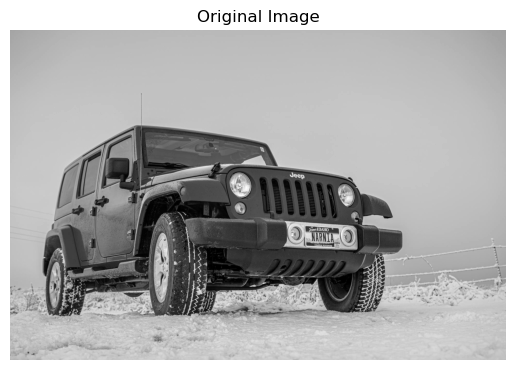


Best Threshold: 123


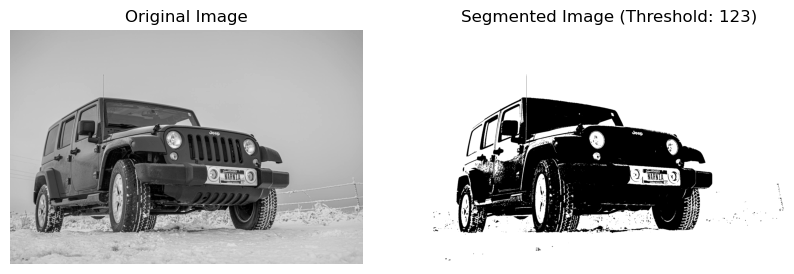

In [20]:
# Lab-5
import numpy as np
import cv2
from matplotlib import pyplot as plt

def grey_wolf_optimizer(obj_func, dim, bounds, num_wolves=10, max_iter=100):
    """
    Grey Wolf Optimizer (GWO) for threshold optimization in image processing.

    Parameters:
    - obj_func: Function to optimize.
    - dim: Number of thresholds (e.g., 1 for single threshold).
    - bounds: Tuple specifying (lower_bound, upper_bound) for thresholds.
    - num_wolves: Number of wolves in the pack.
    - max_iter: Maximum number of iterations.

    Returns:
    - best_position: Best solution (threshold value).
    - best_score: Fitness value of the best solution.
    """
    alpha_score = float("inf")
    beta_score = float("inf")
    delta_score = float("inf")

    alpha_pos = np.zeros(dim)
    beta_pos = np.zeros(dim)
    delta_pos = np.zeros(dim)

    lower_bound, upper_bound = bounds
    wolves = np.random.uniform(lower_bound, upper_bound, (num_wolves, dim))

    for t in range(max_iter):
        a = 2 - t * (2 / max_iter)

        for i in range(num_wolves):
            fitness = obj_func(wolves[i])
            if fitness < alpha_score:
                alpha_score, alpha_pos = fitness, wolves[i].copy()
            elif fitness < beta_score:
                beta_score, beta_pos = fitness, wolves[i].copy()
            elif fitness < delta_score:
                delta_score, delta_pos = fitness, wolves[i].copy()

        for i in range(num_wolves):
            r1, r2 = np.random.rand(dim), np.random.rand(dim)
            A1 = 2 * a * r1 - a
            C1 = 2 * r2
            D_alpha = abs(C1 * alpha_pos - wolves[i])
            X1 = alpha_pos - A1 * D_alpha

            r1, r2 = np.random.rand(dim), np.random.rand(dim)
            A2 = 2 * a * r1 - a
            C2 = 2 * r2
            D_beta = abs(C2 * beta_pos - wolves[i])
            X2 = beta_pos - A2 * D_beta

            r1, r2 = np.random.rand(dim), np.random.rand(dim)
            A3 = 2 * a * r1 - a
            C3 = 2 * r2
            D_delta = abs(C3 * delta_pos - wolves[i])
            X3 = delta_pos - A3 * D_delta

            wolves[i] = (X1 + X2 + X3) / 3
            wolves[i] = np.clip(wolves[i], lower_bound, upper_bound)

    return alpha_pos, alpha_score


# Objective function for image thresholding
def image_thresholding_fitness(threshold, image):
    """
    Fitness function to evaluate the quality of a threshold.

    Parameters:
    - threshold: Threshold value for segmentation.
    - image: Input grayscale image.

    Returns:
    - fitness: Measure of segmentation quality (minimized intra-class variance).
    """
    threshold = int(threshold[0])
    foreground = image[image > threshold]
    background = image[image <= threshold]

    if len(foreground) == 0 or len(background) == 0:
        return float("inf")  # Avoid invalid thresholds

    # Calculate intra-class variance
    foreground_var = np.var(foreground)
    background_var = np.var(background)
    fitness = len(foreground) * foreground_var + len(background) * background_var
    return fitness


if __name__ == "__main__":
    
    print("1BM22CS092\t\t Dipesh Sah")
    print("Lab Experiment-5")
    print("Implementation of Image Processing/Thresholding Using Grey Wolf Optimizer.\n")

    image_path = input("Enter the path to the image file: ")
    num_wolves = int(input("Enter the number of wolves: "))
    max_iter = int(input("Enter the maximum number of iterations: "))

    # Read and preprocess the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Error: Could not read the image file.")
        exit()

    # Show original image
    plt.imshow(image, cmap="gray")
    plt.title("Original Image")
    plt.axis("off")
    plt.show()

    # Define bounds for threshold
    lower_bound, upper_bound = 0, 255

    # Run GWO
    best_threshold, best_score = grey_wolf_optimizer(
        obj_func=lambda t: image_thresholding_fitness(t, image),
        dim=1,
        bounds=(lower_bound, upper_bound),
        num_wolves=num_wolves,
        max_iter=max_iter
    )

    # Apply the best threshold
    best_threshold = int(best_threshold[0])
    _, segmented_image = cv2.threshold(image, best_threshold, 255, cv2.THRESH_BINARY)

    # Display results
    print(f"\nBest Threshold: {best_threshold}")
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap="gray")
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image, cmap="gray")
    plt.title(f"Segmented Image (Threshold: {best_threshold})")
    plt.axis("off")
    plt.show()


In [29]:
# Lab-6
import numpy as np
import random

def objective_function(cell):
    return sum(cell)  

# Initialize the population
def initialize_population(grid_size, num_resources):
    return np.random.randint(0, 10, size=(grid_size[0], grid_size[1], num_resources))

# Evaluate fitness for all cells in the grid
def evaluate_fitness(grid):
    fitness = np.zeros(grid.shape[:2])
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            fitness[i, j] = objective_function(grid[i, j])
    return fitness

# Update the state of a cell based on neighbors and add mutation
def update_cell_state(grid, fitness, x, y, radius, mutation_prob=0.1):
    neighbors = []
    for i in range(-radius, radius + 1):
        for j in range(-radius, radius + 1):
            if 0 <= x + i < grid.shape[0] and 0 <= y + j < grid.shape[1] and (i != 0 or j != 0):
                neighbors.append((x + i, y + j))
    
    # Find the best neighbor based on fitness
    best_neighbor = max(neighbors, key=lambda n: fitness[n[0], n[1]])
    new_state = grid[best_neighbor[0], best_neighbor[1]].copy()
    
    # Add random mutation with a certain probability
    if random.random() < mutation_prob:
        mutation_index = random.randint(0, len(new_state) - 1)
        new_state[mutation_index] = random.randint(0, 10)  # Randomize one resource value
    
    return new_state

# Update grid states
def update_grid(grid, fitness, radius, mutation_prob):
    new_grid = np.copy(grid)
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            new_grid[i, j] = update_cell_state(grid, fitness, i, j, radius, mutation_prob)
    return new_grid

# Run the algorithm
def parallel_cellular_algorithm(grid_size, num_resources, num_iterations, radius, mutation_prob):
    grid = initialize_population(grid_size, num_resources)
    best_solution = None
    best_fitness = -np.inf
    
    for iteration in range(num_iterations):
        fitness = evaluate_fitness(grid)
        grid = update_grid(grid, fitness, radius, mutation_prob)
        
        # Track the best solution
        max_fitness = np.max(fitness)
        if max_fitness > best_fitness:
            best_fitness = max_fitness
            best_solution = grid[np.unravel_index(np.argmax(fitness), fitness.shape)]
        
        print(f"Iteration {iteration + 1}: Best Fitness = {best_fitness}")
    
    return best_solution, best_fitness

if __name__ == "__main__":
    print("1BM22CS092\t\t Dipesh Sah")
    print("\tLab Experiment-6")
    print("Implementation of Resource Allocation \nUsing Parallel Cellular Algorithm with Mutation.\n")

    grid_rows = int(input("Enter the number of rows in the grid: "))
    grid_cols = int(input("Enter the number of columns in the grid: "))
    num_resources = int(input("Enter the number of resources per cell: "))
    num_iterations = int(input("Enter the number of iterations: "))
    neighborhood_radius = int(input("Enter the neighborhood radius: "))
    mutation_prob = float(input("Enter the mutation probability (e.g., 0.1 for 10%): "))
    print()
    
    # Execute the algorithm
    best_solution, best_fitness = parallel_cellular_algorithm(
        (grid_rows, grid_cols),
        num_resources,
        num_iterations,
        neighborhood_radius,
        mutation_prob
    )

    print("\nBest Solution Found:", best_solution)
    print("Best Fitness Achieved:", best_fitness)


1BM22CS092		 Dipesh Sah
	Lab Experiment-6
Implementation of Resource Allocation 
Using Parallel Cellular Algorithm with Mutation.

Enter the number of rows in the grid: 8
Enter the number of columns in the grid: 6
Enter the number of resources per cell: 15
Enter the number of iterations: 20
Enter the neighborhood radius: 1
Enter the mutation probability (e.g., 0.1 for 10%): 0.2

Iteration 1: Best Fitness = 93.0
Iteration 2: Best Fitness = 97.0
Iteration 3: Best Fitness = 100.0
Iteration 4: Best Fitness = 100.0
Iteration 5: Best Fitness = 106.0
Iteration 6: Best Fitness = 106.0
Iteration 7: Best Fitness = 107.0
Iteration 8: Best Fitness = 107.0
Iteration 9: Best Fitness = 114.0
Iteration 10: Best Fitness = 114.0
Iteration 11: Best Fitness = 114.0
Iteration 12: Best Fitness = 114.0
Iteration 13: Best Fitness = 119.0
Iteration 14: Best Fitness = 120.0
Iteration 15: Best Fitness = 122.0
Iteration 16: Best Fitness = 126.0
Iteration 17: Best Fitness = 126.0
Iteration 18: Best Fitness = 126.0

In [34]:
#Lab-7

import random

# Fitness function: calculates the total cost
def evaluate(individual, demands, holding_cost, order_cost, transport_cost):
    """
    Evaluate the total supply chain cost.
    individual: List of order quantities for each warehouse.
    """
    total_holding_cost = 0
    total_order_cost = len(demands) * order_cost
    total_transport_cost = 0
    penalty = 0  

    # costs
    for i in range(len(demands)):
        total_holding_cost += individual[i] * holding_cost
        total_transport_cost += individual[i] * transport_cost

        # penalty if the order quantity does not meet demand
        if individual[i] < demands[i]:
            penalty += 1000  # Heavy penalty for unmet demand

    total_cost = total_holding_cost + total_order_cost + total_transport_cost + penalty
    return total_cost

def initialize_population(pop_size, num_warehouses, max_order):
    return [[random.randint(0, max_order) for _ in range(num_warehouses)] for _ in range(pop_size)]

# Selection: Tournament selection
def selection(population, fitnesses, tournament_size=3):
    selected = []
    for _ in range(len(population)):
        tournament = random.sample(list(zip(population, fitnesses)), tournament_size)
        winner = min(tournament, key=lambda x: x[1])  # Select individual with lowest cost
        selected.append(winner[0])
    return selected

# Crossover: Uniform crossover
def crossover(parent1, parent2, crossover_prob=0.5):
    child1, child2 = parent1[:], parent2[:]
    if random.random() < crossover_prob:
        for i in range(len(parent1)):
            if random.random() < 0.5:
                child1[i], child2[i] = parent2[i], parent1[i]
    return child1, child2

# Mutation: Random mutation
def mutate(individual, max_order, mutation_prob=0.2):
    for i in range(len(individual)):
        if random.random() < mutation_prob:
            individual[i] = random.randint(0, max_order)
    return individual

# Main Gene Expression Algorithm
def gene_expression_algorithm():
    random.seed(42)  
    
    print("1BM22CS092\t\t Dipesh Sah")
    print("Lab Experiment-7")
    print("Implementation of Supply Chain Management \nUsing Gene Expression Algorithm.\n")
    
    num_warehouses = int(input("Enter the number of warehouses: "))
    max_order = int(input("Enter the maximum order quantity per warehouse: "))
    holding_cost = float(input("Enter the holding cost per unit: "))
    order_cost = float(input("Enter the fixed order cost per warehouse: "))
    transport_cost = float(input("Enter the transportation cost per unit: "))

    demands = []
    print("\nEnter the demand for each warehouse:")
    for i in range(num_warehouses):
        demand = int(input(f"Warehouse {i+1} demand: "))
        demands.append(demand)

    # Algorithm Parameters
    population_size = 50
    num_generations = 20
    crossover_prob = 0.8
    mutation_prob = 0.2

    population = initialize_population(population_size, num_warehouses, max_order)

    print("\nRunning Gene Expression Algorithm...")
    for generation in range(num_generations):
        fitnesses = [evaluate(ind, demands, holding_cost, order_cost, transport_cost) for ind in population]

        selected_population = selection(population, fitnesses)

        next_population = []
        for i in range(0, population_size, 2):
            parent1 = selected_population[i]
            parent2 = selected_population[i + 1]
            child1, child2 = crossover(parent1, parent2, crossover_prob)
            next_population.append(mutate(child1, max_order, mutation_prob))
            next_population.append(mutate(child2, max_order, mutation_prob))
        
        population = next_population

        best_cost = min(fitnesses)
        print(f"Generation {generation+1}, Best Cost: {best_cost}")

    final_fitnesses = [evaluate(ind, demands, holding_cost, order_cost, transport_cost) for ind in population]
    best_solution = population[final_fitnesses.index(min(final_fitnesses))]
    print("\nBest Solution Found:")
    for i, qty in enumerate(best_solution):
        print(f"Warehouse {i+1} Order Quantity: {qty}")
    print(f"Total Cost: {min(final_fitnesses)}")

if __name__ == "__main__":
    gene_expression_algorithm()


1BM22CS092		 Dipesh Sah
Lab Experiment-7
Implementation of Supply Chain Management 
Using Gene Expression Algorithm.

Enter the number of warehouses: 3
Enter the maximum order quantity per warehouse: 500
Enter the holding cost per unit: 0.5
Enter the fixed order cost per warehouse: 100
Enter the transportation cost per unit: 2

Enter the demand for each warehouse:
Warehouse 1 demand: 800
Warehouse 2 demand: 1100
Warehouse 3 demand: 750

Running Gene Expression Algorithm...
Generation 1, Best Cost: 3732.5
Generation 2, Best Cost: 3697.5
Generation 3, Best Cost: 3420.0
Generation 4, Best Cost: 3420.0
Generation 5, Best Cost: 3437.5
Generation 6, Best Cost: 3412.5
Generation 7, Best Cost: 3412.5
Generation 8, Best Cost: 3405.0
Generation 9, Best Cost: 3415.0
Generation 10, Best Cost: 3392.5
Generation 11, Best Cost: 3392.5
Generation 12, Best Cost: 3377.5
Generation 13, Best Cost: 3377.5
Generation 14, Best Cost: 3377.5
Generation 15, Best Cost: 3377.5
Generation 16, Best Cost: 3377.5
Gen